# Exploratory Data Analysis of Seattle Biking Data

This notebook contains exploratory analyses of the Seattle bike ridership data taken from the Fremont Bridge bike counter station. Its code will be used in the basis for cleaning and processing data for modeling.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle

In [62]:
bike = pd.read_csv("../../data/raw/Fremont_bridge.csv")
bike['Date'] = pd.to_datetime(bike['Date'], format = "%m/%d/%Y %I:%M:%S %p")

In [63]:
bike.drop(labels = ['Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk'], axis = 1, inplace = True)

In [64]:
bike['Date'] = bike['Date'].map(datetime.date)

In [67]:
bike.drop(index = bike[bike['Date'] > datetime.fromisoformat('2019-10-03').date()].index, axis = 0, inplace = True)

In [110]:
daily_total = bike.groupby('Date', as_index = False).sum()

In [78]:
daily_total.head()

,Date,Fremont Bridge Total
0,2012-10-03,7042.0
1,2012-10-04,6950.0
2,2012-10-05,6296.0
3,2012-10-06,4012.0
4,2012-10-07,4284.0


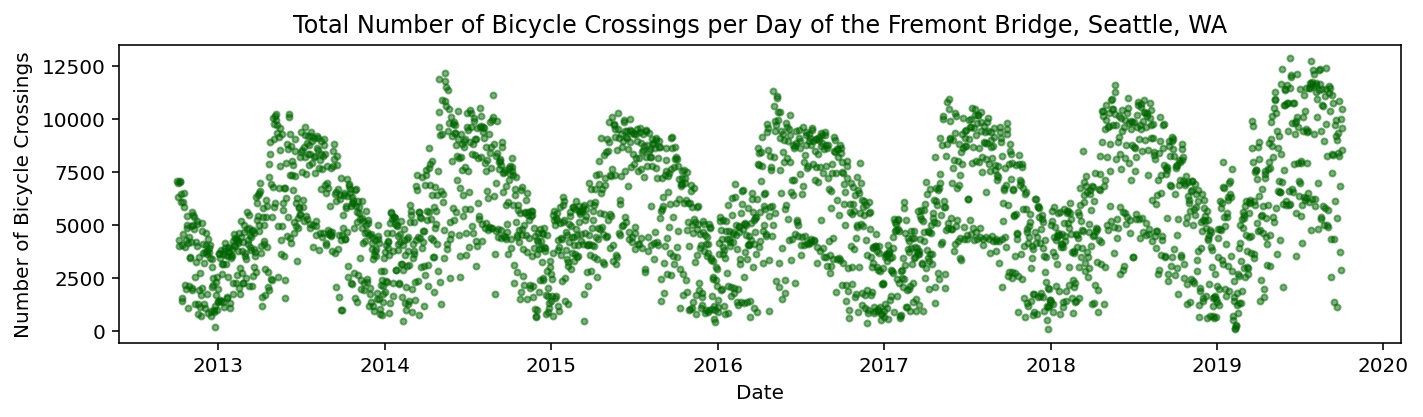

In [164]:
fig, ax = plt.subplots(1,1, figsize = [10, 3])
ax.plot(daily_total['Date'], 
        daily_total['Fremont Bridge Total'], 
        color = 'darkgreen', 
        marker ='.', 
        linewidth = 0, 
        alpha = .5)
plt.xlabel('Date')
plt.ylabel('Number of Bicycle Crossings')
plt.title('Total Number of Bicycle Crossings per Day of the Fremont Bridge, Seattle, WA')
plt.tight_layout()
plt.savefig('DailyCrossings.png', dpi = 200);

In [111]:
daily_total['Day of Week'] = daily_total['Date'].apply(datetime.weekday)

In [80]:
daily_total.head()

,Date,Fremont Bridge Total,Day of Week
0,2012-10-03,7042.0,2
1,2012-10-04,6950.0,3
2,2012-10-05,6296.0,4
3,2012-10-06,4012.0,5
4,2012-10-07,4284.0,6


In [24]:
def numeral_to_day(x):
    days = {'0': 'Monday', 
            '1': 'Tuesday', 
            '2': 'Wednesday', 
            '3': 'Thursday', 
            '4': 'Friday', 
            '5': 'Saturday',
            '6': 'Sunday'}
    return days[str(x)]

In [113]:
dow_stats = daily_total.groupby('Day of Week', as_index = False).agg(['mean', 'median', 'std'], axis = 'columns')

In [114]:
dow_stats

Fremont Bridge Total                     
                            mean  median          std
Day of Week                                          
0                    6421.167123  6196.0  2420.247859
1                    6874.416438  6674.0  2544.365436
2                    6814.442623  6656.0  2509.664190
3                    6471.874317  6431.0  2484.259951
4                    5827.336986  5634.0  2251.425499
5                    3091.994521  2988.0  1545.101081
6                    2938.032877  2804.0  1576.214264

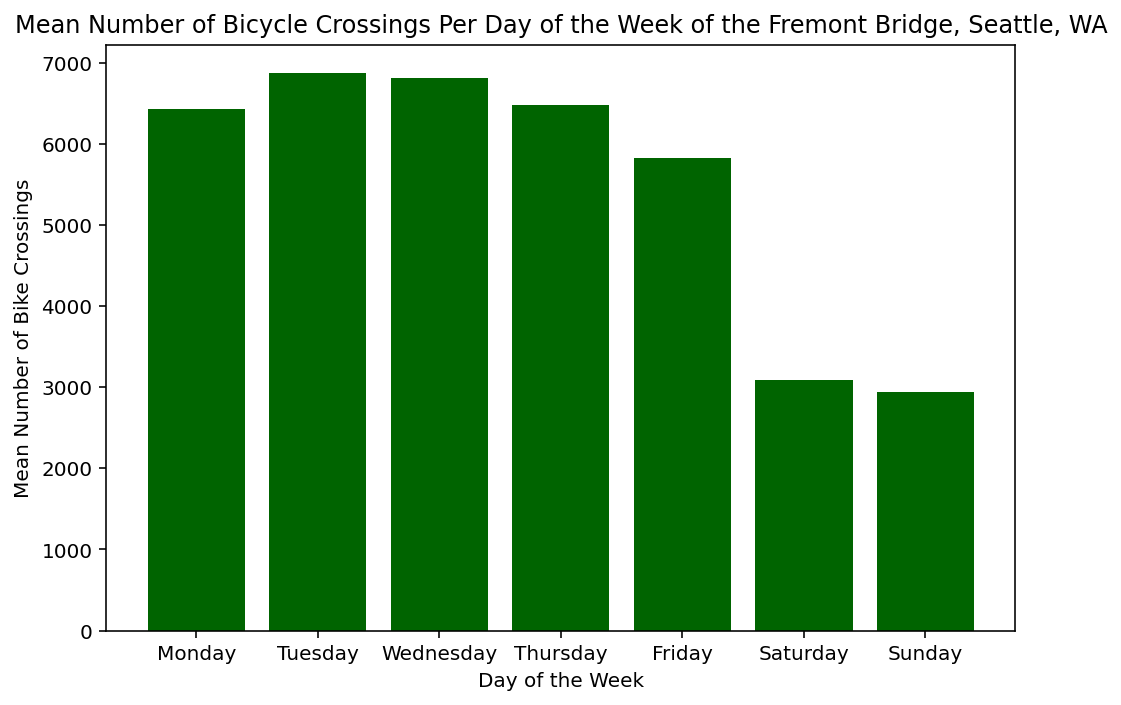

In [165]:
fig, ax = plt.subplots(1,1, figsize = [8, 5])
ax.bar(dow_stats.index, 
       dow_stats['Fremont Bridge Total']['mean'], 
       tick_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
       color = 'darkgreen')
plt.title('Mean Number of Bicycle Crossings Per Day of the Week of the Fremont Bridge, Seattle, WA')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Number of Bike Crossings')
plt.tight_layout()
plt.savefig('MeanDoWCrossings.png', dpi = 200);


In [145]:
daily_total['Month'] = daily_total['Date'].apply(lambda x: x.month)

In [146]:
daily_total.head()

,Date,Fremont Bridge Total,Day of Week,Month
0,2012-10-03,7042.0,2,10
1,2012-10-04,6950.0,3,10
2,2012-10-05,6296.0,4,10
3,2012-10-06,4012.0,5,10
4,2012-10-07,4284.0,6,10


In [151]:
monthly_mean = daily_total[['Month', 'Fremont Bridge Total']].groupby('Month', as_index = False).mean()

In [152]:
monthly_mean

,Month,Fremont Bridge Total
0,1,3671.880184
1,2,3501.208122
2,3,4534.737327
3,4,5452.200000
4,5,7531.585253
5,6,7475.990476
6,7,7757.990783
7,8,7439.456221
8,9,6366.647619
9,10,5289.137615


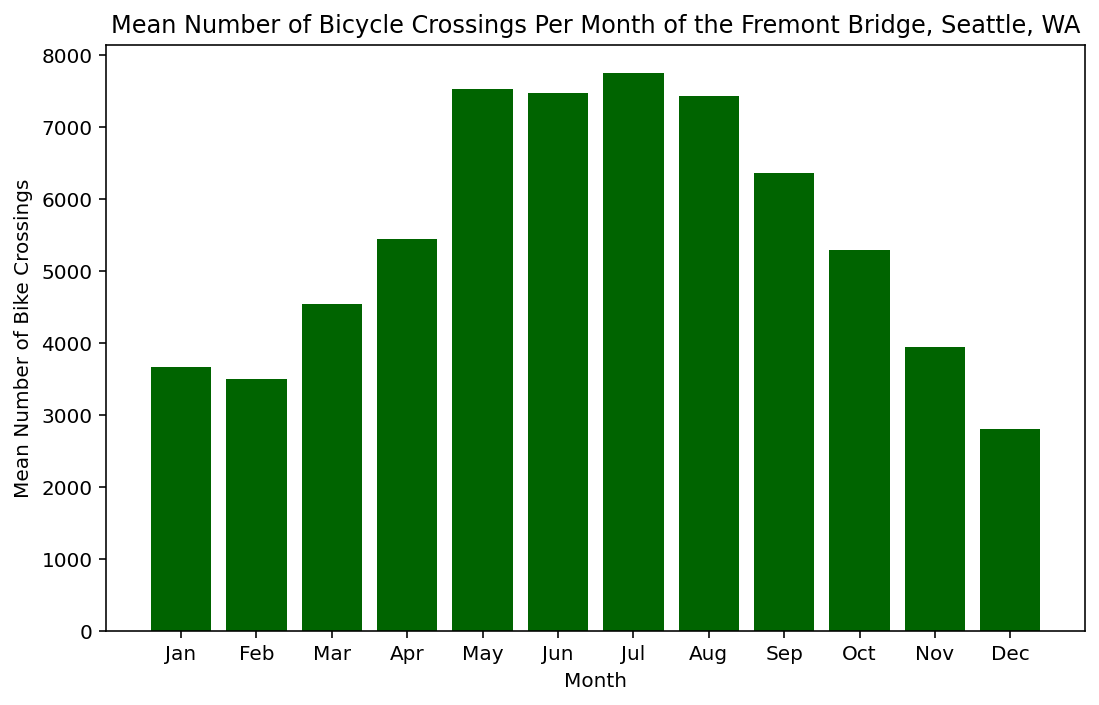

In [166]:
fig, ax = plt.subplots(1,1, figsize = [8, 5])
ax.bar(monthly_mean["Month"], 
       monthly_mean['Fremont Bridge Total'], 
       tick_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
       color = 'darkgreen')
plt.title('Mean Number of Bicycle Crossings Per Month of the Fremont Bridge, Seattle, WA')
plt.xlabel('Month')
plt.ylabel('Mean Number of Bike Crossings')
plt.tight_layout()
plt.savefig('MeanMonthlyCrossings.png', dpi = 200);
